Credit risk modeling is a crucial aspect of risk management in the financial industry. It involves assessing the likelihood of borrowers or counterparties defaulting on their financial obligations, such as loan repayments or bond payments. Banks, lending institutions, and investors use credit risk modeling to evaluate the creditworthiness of individuals, businesses, or even countries.

Credit risk modeling has direct and practical applications in the financial sector. It involves analyzing real data to predict creditworthiness and assess the risk of default, which can significantly impact a company's bottom line. As a data scientist, being able to work on real-world problems with tangible outcomes can be professionally fulfilling.

---



# **Basic of Credit Risk**

- `Credit risk` is the possibility that someone who has borrowed money will not repay it.
- When a money from a bank or a financial institution, has been lend to an individual or a business, it has what we called `Expected Loss`.

- `Expected Loss` (EL) is the amount the firm loses as a result of loan default.

- EL has three (3) primary component:
  1. Probability of Default  (PD) - the likelihood that someone will default on a loan.
  2. Exposure at Default (EAD) - the outstading amount or balance at the time of default
  3. Loss given default (LGD) - the ratio of the exposure against recovery from the loss.

  ${EL} = {PD} * {EAD} * {LGD} $

  We'll assume that the exposure is the full value of the loan, and the loss given default is 100%. This means that a default on each loan is a loss of the entire amount.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
dirs  = "/content/drive/My Drive/Data Science Portfolio/2023/Applied/data"
credit_df = pd.read_csv(dirs+'/raw_credit_loan_data.csv')
credit_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# **Sanity Checks**

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
credit_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

`person_emp_length` has **895** missing data, while `loan_int_rate` has **3116** missing information.

# **Exploratory Data Analysis**

In [ ]:
credit_num = credit_df.select_dtypes('number').drop('loan_status', axis=1)
credit_summary = credit_num.describe().T
print("Summary Table")
credit_summary

Summary Table


,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [ ]:
fig = px.histogram(credit_df, x="loan_amnt",
                   nbins=100, template="plotly_white")
fig.show()

- Loan amount ranges from 500 to 35,000.
- Loan amount distribution is right skewed. Mean loan amount is 9,589.
- Most of the loan application are around 10,000 to 10,500.
- 25% of the total loan applications amounts 5,000 below.
- 50% of the total loan applications amounts 5,000 to 8,000.
- 75% of the total loan application amounts 12,200 to 8,000.

In [ ]:
fig = px.scatter(credit_df,
                 x='person_age',
                 y='person_emp_length',
                 template='plotly_white',
                 width=500, height=500)
fig.update_layout(title="Age vs Employee Length")
fig.show()

We can see that there are outliers between the employee length and age. `person_emp_length` has values that exceed 120 years, while `person_age` exceeds 80 years (which is way above life expectancy).

In [ ]:
fig = px.scatter(credit_df,
                 x='person_age',
                 y='loan_amnt',
                 template='plotly_white',
                 width=500, height=500)
fig.update_layout(title="Age vs Loan Amount")
fig.show()

In [ ]:
# Create a cross table of the loan intent and loan status
pd.crosstab(credit_df['loan_intent'],
            credit_df['loan_status'], margins=True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [ ]:
# Create a cross table of home ownership, loan status, and grade
pd.crosstab(credit_df['person_home_ownership'],
                 [credit_df['loan_status'],
									credit_df['loan_grade']])

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

In [ ]:
#
pd.crosstab(credit_df['person_home_ownership'],
									credit_df['loan_status'],
		              values=credit_df['loan_percent_income'],
									aggfunc='mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


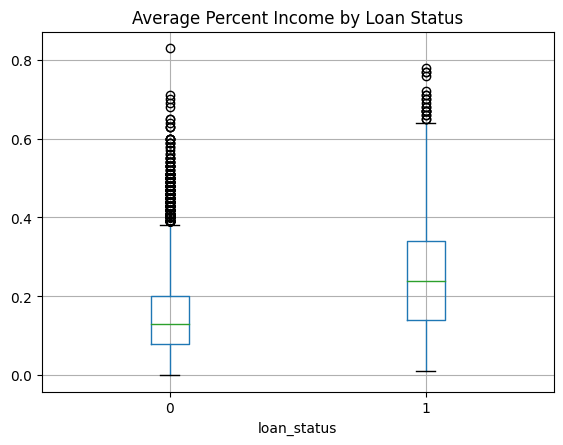

In [ ]:
# Create a box plot of percentage income by loan status
credit_df.boxplot(column = ['loan_percent_income'],
                by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

Based on the boxplot above, both default and non-default loans contains outliers (values that exceeds the interquartile maximum).

#### Dealing with Outliers

In [ ]:
# Create crosstable to detect default credits cause by outliers
print("With Outliers")
pd.crosstab(credit_df["loan_status"],
            credit_df["person_home_ownership"],
            values=credit_df["person_emp_length"],
            aggfunc=['max', 'min']).round(2)

With Outliers


max                         min                
person_home_ownership MORTGAGE OTHER   OWN   RENT MORTGAGE OTHER  OWN RENT
loan_status                                                               
0                        123.0  24.0  31.0   41.0      0.0   0.0  0.0  0.0
1                         34.0  11.0  17.0  123.0      0.0   0.0  0.0  0.0

In [ ]:
# create an array of indices where employment length is greater than 60
indices = credit_df[credit_df["person_emp_length"] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
credit_df_new = credit_df.drop(indices)

# Create new crosstab with the same specification
pd.crosstab(credit_df_new["loan_status"],
            credit_df_new["person_home_ownership"],
            values=credit_df_new["person_emp_length"],
            aggfunc=['max', 'min']).round(2)

max                        min                
person_home_ownership MORTGAGE OTHER   OWN  RENT MORTGAGE OTHER  OWN RENT
loan_status                                                              
0                         38.0  24.0  31.0  41.0      0.0   0.0  0.0  0.0
1                         34.0  11.0  17.0  27.0      0.0   0.0  0.0  0.0

Maximum employee length for mortgage credit has been clipped down to 38.

In [ ]:
import matplotlib
# Create cut-off for values exceeding the person age of 80
credit_df_new = credit_df_new.drop(credit_df_new[credit_df_new["person_age"]>80].index)

fig = px.scatter(credit_df_new,
                 x=credit_df_new['person_age'],
                 y=credit_df_new['loan_int_rate'],
                 color=credit_df_new['loan_status'],
                 template='plotly_white')
fig.show()

#### **Dealing with Missing Values**

Missing data posed a threat in our data, such as misclassification of default credit. There are various types of missing data:
- Null Values (Nan)
- Empty strings
- Not an entirely empty row

**Negative Effects:**
- Affects the model performance
- Creates bias in unanticipated ways
- May cause errors for some ML models

**How to handle?**
- Imputation (mean value for numerical)
- Removing of rows (for below average ratio)
- Removing an entire column (for above average ratio)

**Some implicit assumption for missing data**

|Missing Data|Interpretation|Action|
|------------|--------------|------|
|*Null* in `loan_status`|Loan Recently approved|Remove from the prediction data|
|*Null* in `person_age`|Age not recorded or disclosed|Replace with median|



In [ ]:
# Print a null value column array
print(credit_df_new.columns[credit_df_new.isnull().any()])

# # Print the top five rows with nulls for employment length
credit_df_new[credit_df_new["person_emp_length"].isnull()].head()

Index(['person_emp_length', 'loan_int_rate'], dtype='object')


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


In [ ]:
# Impute the null values with the median value for all employment length
credit_df_new['person_emp_length'].fillna((credit_df_new['person_emp_length'].median()), inplace=True)

# Sanity check the new distribution of employee length
fig  = px.histogram(credit_df_new, x="person_emp_length",
                   nbins=100, template="plotly_white")
fig.show()

In [ ]:
# print the number of null interest rate
print("Number of null interest rate: ",credit_df_new["loan_int_rate"].isnull().sum())
print("Proportion: ", credit_df_new["loan_int_rate"].isnull().sum()/credit_df_new.shape[0])

Number of null interest rate:  3114
Proportion:  0.09560358590200171


looking at the proportion of null interest rate, we can drop it from our dataset.

In [ ]:
# Store the array on indices
indices = credit_df_new[credit_df_new["loan_int_rate"].isnull()].index
credit_df_clean = credit_df_new.drop(indices)

In [ ]:
# =====> trigger

# **Logistic Regression for Probability Default**

Logistic Regression is one of the basic classification algorithm that we can use to predict credit default. Here, we will create threshold the `predict_proba` method of the `LogisticRegression` function from `scikit-learn` library.

|Probability of Default|Interpretation|Predicted loan status|
|-------------------|--------------|---------------------|
|0.4|Unlikely to default|0|
|0.9|Very likely to default|1|
|0.1|Very Unlikely to default|1|

In [ ]:
from sklearn.linear_model import LogisticRegression
import pprint
clf_logistic_single = LogisticRegression()

#### **Simple Logistic Regression**

In [ ]:
X = credit_df_clean[['loan_int_rate']]
y = credit_df_clean[['loan_status']]

clf_logistic_single.fit(X, np.ravel(y))

# Print the model parameters
print("Model Parameter: ")
pprint.pprint(clf_logistic_single.get_params())

# Print the intercept of the model
print("Model intercept: ", clf_logistic_single.intercept_)

Model Parameter: 
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
Model intercept:  [-4.45771481]


#### **Multivariate Logistic Regression**

In [ ]:
X_multi = credit_df_clean[['loan_int_rate','person_emp_length']]
y = credit_df_clean[['loan_status']]

clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))
print("Model Coef: ",clf_logistic_multi.coef_)
print("Model Intercept: ",clf_logistic_multi.intercept_)

Model Coef:  [[ 0.27124059 -0.05351084]]
Model Intercept:  [-4.21627794]


#### **Split data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = credit_df_clean[['loan_int_rate','person_emp_length', 'person_income']]
y = credit_df_clean[['loan_status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))
print("Model Coef: ",clf_logistic.coef_)
print("Model Intercept: ",clf_logistic.intercept_)

Model Coef:  [[ 8.48562975e-02 -6.87475582e-02 -3.23520841e-05]]
Model Intercept:  [-0.0148329]


- We can observed that both `coefficient` and `intercept` **increased** as more features are added.

#### **Changing Coefficients**

In [ ]:
# Defining two sets of data containing different features
X1 = credit_df_clean[['person_income', 'person_emp_length', 'loan_amnt']]
X2 = credit_df_clean[['person_income', 'loan_percent_income', 'cb_person_cred_hist_length']]

# Split, but disregard temporarily the test set
X1_train, _, y1_train, _ = train_test_split(X1, y, test_size=0.4, random_state=123)
X2_train, _, y2_train, _ = train_test_split(X2, y, test_size=0.4, random_state=123)

# Define two different classifiers
clf_logistic1 = LogisticRegression(solver='lbfgs').fit(X1_train, np.ravel(y1_train))
clf_logistic2 = LogisticRegression(solver='lbfgs').fit(X2_train, np.ravel(y2_train))

# Classifier 1
print("Coef (1): ", clf_logistic1.coef_)
print("Intercept (1): ", clf_logistic1.intercept_, "\n")

# Classifier 2
print("Coef (2): ", clf_logistic2.coef_)
print("Intercept (2): ", clf_logistic2.intercept_)

Coef (1):  [[-4.09058899e-05 -2.67323059e-08  1.09085895e-04]]
Intercept (1):  [-2.47252758e-09] 

Coef (2):  [[-2.18707692e-05  1.82020273e-10 -1.82210962e-09]]
Intercept (2):  [-3.46096839e-10]


**Conclusion**
- In modeling, the weights or computed coefficient are affected by:
  - No. of features included
  - Different combination of features

**But, why is that?**

#### **One-hot encoding**

To fully utilize the information we have in our dataset, we have to convert the categorical data into numerical data. This is called **One-hot encoding**.

In [ ]:
# Create two data sets for numeric and non-numeric data
cred_num = credit_df_clean.select_dtypes(exclude=['object'])
cred_str = credit_df_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hoe encoded columns and numeric
credit_df_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns on the new dataset
print(credit_df_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [ ]:
# split again
X = credit_df_prep.drop(['loan_status'], axis=1)
y = credit_df_prep['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

#### **Predicting Probability Default**

In [ ]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,-1], columns = ['prob_default'])
true_df = y_test

# Concatenate and print the two data frames for comparison
test_pred_df = pd.concat([true_df.reset_index(drop = True),
													preds_df], axis = 1)
print(test_pred_df['loan_status'].value_counts())
test_pred_df.sample(5)

0    9193
1    2591
Name: loan_status, dtype: int64


,loan_status,prob_default
4703,0,0.199281
9432,0,0.317884
2370,0,0.142867
7866,1,0.152918
4123,0,0.269857


Text(0, 0.5, 'Count')

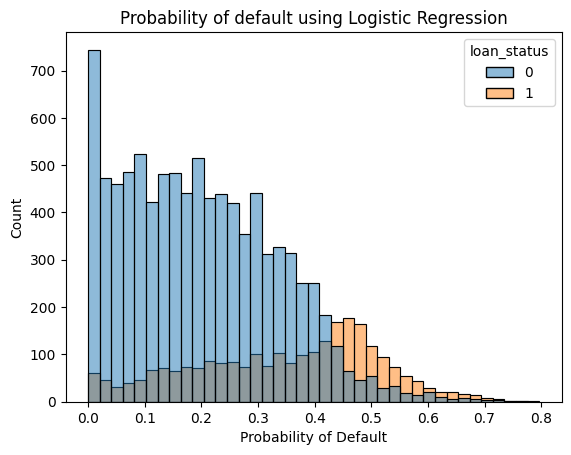

In [ ]:
sns.histplot(test_pred_df, x='prob_default', hue="loan_status")
plt.title("Probability of default using Logistic Regression")
plt.xlabel("Probability of Default")
plt.ylabel("Count")

In [ ]:
from sklearn.metrics import (classification_report,
                            confusion_matrix,
                            precision_recall_fscore_support,
                            roc_curve,
                            roc_auc_score,
                            accuracy_score)

- Now let's set a threshold for probability default, for any application that increases 0.5

In [ ]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts(), "\n")

# Print the classification report
target_names = ['Non-Default', 'Default']

print(confusion_matrix(y_test, preds_df['loan_status']))
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

0    11139
1      645
Name: loan_status, dtype: int64 

[[9008  185]
 [2131  460]]
              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9193
     Default       0.71      0.18      0.28      2591

    accuracy                           0.80     11784
   macro avg       0.76      0.58      0.59     11784
weighted avg       0.79      0.80      0.75     11784



**How to interpret the Classification Report?**
- **Precision**, is the ratio of predicted `true positive` to the `total predicted positive`.
  - precision = TP / TP + FP
  - if FP is `Low` ; Precision is `High`; Performance is `Good`.
  - if FP is `High`; Precision is `Low`; Performance is `Bad`.

- **Recall** or **sensitivity**, is the ratio of predicted `true positive` to the `total actual positive`
  - recall = TP / TP + FN
  - if FN is `Low` ; Precision is `High`; Performance is `Good`.
  - if FN is `High` ; Precision is `Low`; Performance is `Bad`.
________________

**In this model we have**:
- **High precision** (0.71): The model is cautious and conservative in predicting loan defaults. When it does predict a default, it's often correct, but it might miss many actual defaults.

- **Low recall** (0.18): The model is missing a considerable number of loan defaults. It's not very sensitive to capturing all the actual defaults.

_________________

Since Precision and Recall has a trade-off, we can also interpret the model performance using F-score.

- **F1-score** or **F-Measure**, is a metric that expresses both `precision` and `recall`. Since there are instances that precision is excellent but recall is terrible.
  - f_measure = 2 * Precision * Recall / Precision + Recall
  - An F1 score of 1 indicates perfect precision and recall.
  - An F1 score of 0 indicates poor performance in both precision and recall.
  - Higher F1 scores generally indicate a better balance between precision and recall.

  An F1 score of **0.285** suggests that the model's overall performance is not very balanced. It indicates that the trade-off between precision and recall is skewed, likely due to the significant imbalance between the classes (loan defaults and non-defaults). In this case, the model seems to be better at correctly identifying true positives (high precision) but struggles to capture a substantial portion of actual positives (low recall).

In [ ]:
# =======> terminate run

In [ ]:
# sns.heatmap(confusion_matrix(y_test, preds_df['loan_status']), annot=True, cmap='viridis')

#### **ROC AUC: Visually scoring credit models**

**Receiver Operating Curve (ROC)**
- Graphical representation of True Positive Rate (or recall) against False Positive Rate (FPR) to show the performance of the classification model.

**Area Under the ROC (AUC)**
- The AUC is a numerical value that quantifies the overall performance of a classification model based on the ROC curve. It represents the area under the ROC curve and ranges from 0 to 1.
  - A model with an AUC of **0.5** performs no better than `random chance`.
  - While a model with an AUC of **1.0** indicates `perfect discrimination` between the two classes.

In [ ]:
# Create a dataset for probability default using logistic regression
lr_predict_proba = clf_logistic.predict_proba(X_test)

# Print accuracy score for test set
print("Accuracy at train set: ", clf_logistic.score(X_train, y_train))

Accuracy at train set:  0.8077967636075591


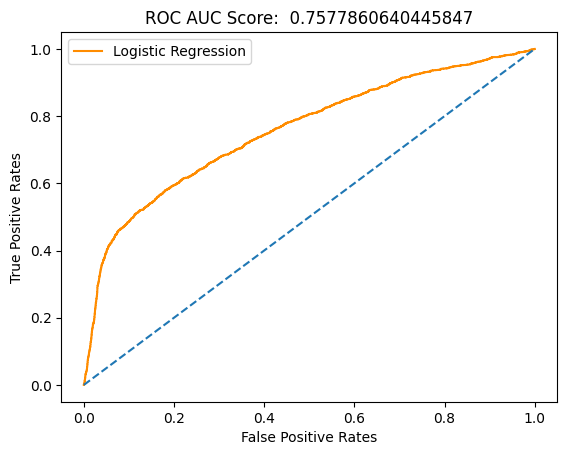

In [ ]:
# Plot the ROC curve of the probabilities of default
prob_default = lr_predict_proba[:, 1]
fallout, sensitivity_recall, thresholds = roc_curve(y_test, prob_default)
auc_score_lr = roc_auc_score(y_test, prob_default)

plt.plot(fallout, sensitivity_recall, color='darkorange')
plt.plot([0,1], [0,1], linestyle='--')
plt.title(f"ROC AUC Score:  {auc_score_lr}")
plt.xlabel("False Positive Rates")
plt.ylabel("True Positive Rates")
plt.legend(['Logistic Regression'])
plt.show()

An ROC AUC score of 0.77 indicates that your credit risk model has moderate discriminative power in distinguishing between loan defaults and non-defaults
____

**Classification Report** - Underperforming model.

**Portfolio Impact**
- Total loan default = $ 50,000
- Sensitivity to loan default = 18%

|Loan Amount|Default Predicted/Not Predicted|Equation|Estimated Loss on Defaults|
|-----------|-------------------------------|--------------------------|-------|
|$ 50| 0.18/0.82 | 50000 x 0.82 * 50| 2,050,000

Above is demonstration of the effect of low sensitivity classification. Assumme a total of 50,000 loan default, but from our classification report we only predict 18% of it. The other 82% are incorrectly classified, and the estimated loss will be $ 2.05 million.

In [ ]:
# Reassign the values of loan status based on the new threshold
print("Threshold for probability of default: ", 0.4)
preds_df['loan_status_04'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# New confusion matrix
print(confusion_matrix(y_test, preds_df['loan_status_04']), "\n")
print(classification_report(y_test, preds_df['loan_status_04']))

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status_04'].value_counts()[1]
print("No. of default:", num_defaults)

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test, preds_df['loan_status_04'])[1][1]

# Calculate the estimated impact of the new default recall rate
avg_loan_amnt = credit_df_clean["loan_amnt"].mean()
print("Average loan amount: ", avg_loan_amnt.round(2))
est_impact = int(avg_loan_amnt * num_defaults * (1 - default_recall))
print("Estimated impact: ", '{:,.2f}'.format(est_impact))

Threshold for probability of default:  0.4
[[8480  713]
 [1399 1192]] 

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      9193
           1       0.63      0.46      0.53      2591

    accuracy                           0.82     11784
   macro avg       0.74      0.69      0.71     11784
weighted avg       0.81      0.82      0.81     11784

No. of default: 1905
Average loan amount:  9583.59
Estimated impact:  9,857,649.00


In [ ]:
# =========> terminate runtime

# **Modeling: Gradient Boosted Trees**

**Gradient Boosted Trees (GBT)** is one of the most intuitive classification algorithm that can be used for Credit Risk modeling. Like Random Forest (RF), GBT is based on decision trees, but instead, uses a less accurate tree or a weak learner called stump. GBT, unlike RF, decreases bias not variance. It is usually applied when a classifier is stable, simple, and has high bias.

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgboost
xgb = XGBClassifier()

In [ ]:
# Fit the model into the training data
clf_gbt = xgb.fit(X_train, np.ravel(y_train))

# Predict the probability
gbt_preds = clf_gbt.predict_proba(X_test)

In [ ]:
# Create temporary dataframe for test prediction
pred_df = pd.DataFrame(gbt_preds[:,1], columns=['prob_default'])
true_df = y_test

# join the two dataframes by column
test_results = pd.concat([true_df.reset_index(drop=True), pred_df], axis=1)
test_results.sample(5)

,loan_status,prob_default
4042,1,0.997114
959,0,0.014408
2114,0,0.138674
2155,0,0.015500
8127,0,0.038732


Text(0, 0.5, 'Count')

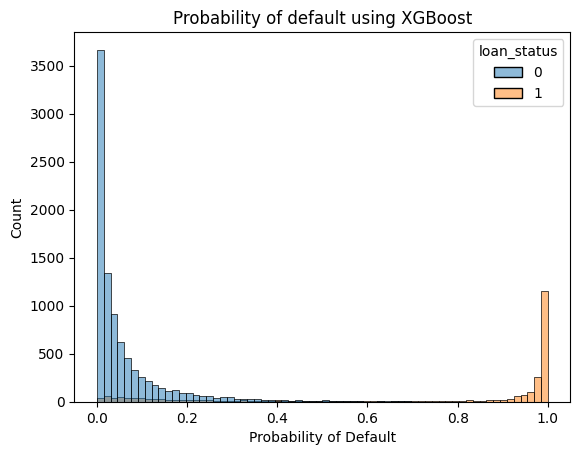

In [ ]:
sns.histplot(test_results, x='prob_default', hue="loan_status")
plt.title("Probability of default using XGBoost")
plt.xlabel("Probability of Default")
plt.ylabel("Count")

Here, we can see that there is a clear gap between default to non-default loan application.

#### **Assessing Gradient Boosted Trees**

In [ ]:
# Predict the labels for loan status
gbt_pred_labels = clf_gbt.predict(X_test)

# Check the values created by the predict method
target_names = ['Non-default', 'Default']
print(classification_report(y_test, gbt_pred_labels,
                            target_names=target_names))

print("\nConfusion Matrix")
print(confusion_matrix(y_test, gbt_pred_labels))

              precision    recall  f1-score   support

 Non-default       0.93      0.99      0.96      9193
     Default       0.95      0.73      0.83      2591

    accuracy                           0.93     11784
   macro avg       0.94      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784


Confusion Matrix
[[9101   92]
 [ 693 1898]]


- Default precision is **0.95**; therefore low False Positive.
- Default recall is **0.73**; therefore low False Negative
- F1-score is 0.83; indicates there is an optimality between precision and recall.

#### **Column importance & default prediction**

In [ ]:
clf_gbt = xgb.fit(X_train, np.ravel(y_train))

# Print the column importance from the model
clf_scores = clf_gbt.get_booster().get_score(importance_type='weight')
# pprint.pprint(clf_gbt.get_booster().get_score(importance_type='weight'))

In [ ]:
fig = px.bar(x=clf_scores.values(),
             y=clf_scores.keys(),
             text=clf_scores.values(),
             template='plotly_white')
fig.update_layout(title='Feature Importance')
fig.show()

#### **Cross validating credit products**

In [ ]:
# Create a parameter grid
params = {'objective': 'binary:logistic',
          'seed': 123,
          'eval_metric': 'auc'}

# Set the values for the number of folds and stopping iterations
n_folds = 5
early_stopping = 10

# Create the DTrain matrix for XGBoost
DTrain = xgboost.DMatrix(X_train, label=y_train)

# Create the dataframe of cross validations
cv_df = xgboost.cv(params=params, num_boost_round = 6,
               dtrain=DTrain, nfold=n_folds,
               early_stopping_rounds=early_stopping)

print(cv_df)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.900397       0.001428       0.894490      0.006779
1        0.911759       0.000716       0.907199      0.005570
2        0.916244       0.001709       0.909938      0.004789
3        0.920591       0.001632       0.914351      0.005096
4        0.925272       0.001176       0.916534      0.005417
5        0.929394       0.000372       0.919286      0.004490


- We can see that the train-auc and test-auc improves as the model trains on each fold. These suggest that performance will be stable.

#### **Limits to cross validation**

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.900491       0.001050       0.893419      0.009399
1        0.911500       0.001319       0.907569      0.006598
2        0.915224       0.001639       0.910971      0.007005
3        0.920037       0.001566       0.913289      0.006509
4        0.924199       0.001590       0.916044      0.005294
0.95


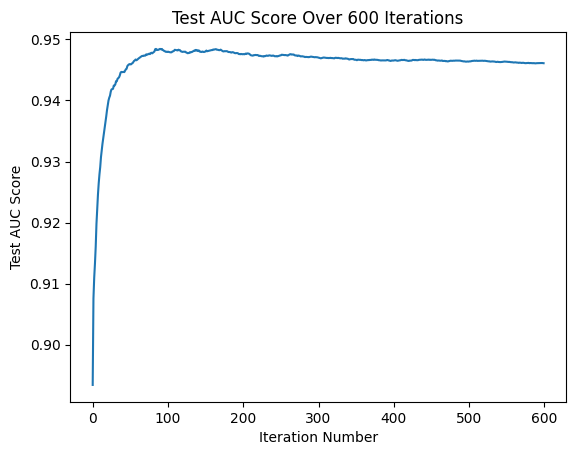

In [ ]:
# Cross-validate
cv_results_big = xgboost.cv(params, DTrain, num_boost_round = 600, nfold=10,
              shuffle = True)

# Print the first five rows of the CV results data frame
print(cv_results_big.head())

# Calculate the mean of the test AUC scores
print(np.mean(cv_results_big['test-auc-mean']).round(2))

# Plot the test AUC scores for each iteration
plt.plot(cv_results_big['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

Notice that the test AUC score never quite reaches `1.0` and begins to decrease slightly after `100` iterations. This is because this much cross-validation can actually cause the model to become `overfit`. So, there is a limit to how much cross-validation you should to.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Another way of getting the performance of cross validating the training set
gbt = XGBClassifier(learning_rate=0.1,
                    max_depth=7)

cv_scores = cross_val_score(gbt, X_train,
                            np.ravel(y_train), cv=4)
print(cv_scores)
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[0.93527947 0.93935279 0.93571752 0.92575826]
Average accuracy: 0.93 (+/- 0.01)


#### **Cost of imbalance dataset**

- A `false negative` (default predicted as non-default) is much more costly.

|Person|Loan Amount|Potential Profit|Predicted Status|Actual Status|Losses|
|---|---|---|---|---|---|
|A|1000|10|Default|Non-default|-10|
|B|1000|10|Non-default|Default|-10|

**Causes of imbalance**
- Data problems
  - Credit data was not sampled corrrectly
  - Data storage problems
- Business processes:
  - Measures already in place to not accept probable defaults
  - Probable defaults are quickly sold to other firms
- Behavioral factors
  - Normally, people do not default on their loans
    - The less often they default, the higher their credit rating.

|Method|Pros|Cons|
|---|---|---|
|Gather more data| Increases no. of defaults| (%) of defaults may not change|
|Penalize models|increases recal for defaults| Model requires more tunig and maintenance|
|Sample data differently|Least technical adjustment| Fewer defaults in data|

#### **Balancing Train set**

In [ ]:
X_y_train = pd.concat([X_train.reset_index(drop = True),
											 y_train.reset_index(drop=True)], axis=1)

count_nondefault, count_default = X_y_train['loan_status'].value_counts()

# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop=True),
                             defaults.reset_index(drop=True)], axis=0)

X_y_train_under['loan_status'].value_counts()

0    3872
1    3872
Name: loan_status, dtype: int64

In [ ]:
# Create undersample train set
X_train_under = X_y_train_under.drop(['loan_status'], axis=1)
y_train_under = X_y_train_under['loan_status']

# Fit and predict again
clf_gbt_under = xgb.fit(X_train_under, np.ravel(y_train_under))
gbt_predict_proba = xgb.predict_proba(X_test)
gbt_preds_under = xgb.predict(X_test)

In [ ]:
target_names = ['Non-Default', 'Default']
print("Performance after undersampling")
print(classification_report(y_test, gbt_preds_under, target_names=target_names))

Performance after undersampling
              precision    recall  f1-score   support

 Non-Default       0.95      0.91      0.93      9193
     Default       0.71      0.82      0.76      2591

    accuracy                           0.89     11784
   macro avg       0.83      0.86      0.85     11784
weighted avg       0.90      0.89      0.89     11784



In [ ]:
# Print the confusion matrix for both old and new models
print("Imbalance: \n",confusion_matrix(y_test,gbt_pred_labels), "\n")
print("Undersample: \n",confusion_matrix(y_test,gbt_preds_under))

Imbalance: 
 [[9101   92]
 [ 693 1898]] 

Undersample: 
 [[8340  853]
 [ 462 2129]]


In [ ]:
# Print and compare the AUC scores of the old and new models
print("Imbalance: ",roc_auc_score(y_test, gbt_pred_labels))
print("Undersample: ",roc_auc_score(y_test, gbt_preds_under))

Imbalance:  0.8612640430062257
Undersample:  0.8644512380692726


# **Model Evaluation & Implementation**

#### **Comparing model reports**

In [ ]:
target_names = ['Non-default', 'Default']
print("Logistic Regression")
print(classification_report(y_test, preds_df['loan_status_04'], target_names=target_names))

print("Gradient Boosted Trees")
print(classification_report(y_test, gbt_preds_under, target_names=target_names))

Logistic Regression
              precision    recall  f1-score   support

 Non-default       0.86      0.92      0.89      9193
     Default       0.63      0.46      0.53      2591

    accuracy                           0.82     11784
   macro avg       0.74      0.69      0.71     11784
weighted avg       0.81      0.82      0.81     11784

Gradient Boosted Trees
              precision    recall  f1-score   support

 Non-default       0.95      0.91      0.93      9193
     Default       0.71      0.82      0.76      2591

    accuracy                           0.89     11784
   macro avg       0.83      0.86      0.85     11784
weighted avg       0.90      0.89      0.89     11784



#### **Macro-average of F1-score**

In [ ]:
# Print the default F-1 scores for the logistic regression
print("F-Score")
print("Logistic Regression: ",precision_recall_fscore_support(y_test, preds_df['loan_status_04'], average = 'macro')[2])

# Print the default F-1 scores for the gradient boosted tree
print("Gradient Boosted Trees: ",precision_recall_fscore_support(y_test, gbt_preds_under, average = 'macro')[2])

F-Score
Logistic Regression:  0.7097554276433637
Gradient Boosted Trees:  0.8454825285668851


#### **Comparing ROCs**

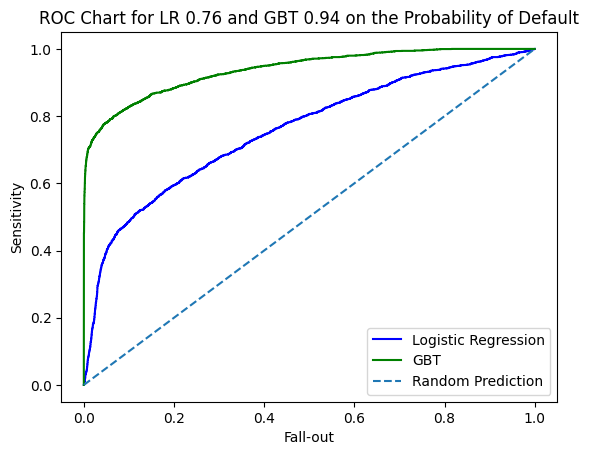

In [ ]:
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, lr_predict_proba[:,1])
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, gbt_predict_proba[:,1])

auc_score_gbt = roc_auc_score(y_test, gbt_predict_proba[:,1])

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title(f"ROC Chart for LR {auc_score_lr.round(2)} and GBT {auc_score_gbt.round(2)} on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [ ]:
# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, lr_predict_proba[:,1]))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, gbt_predict_proba[:,1]))

Logistic Regression AUC Score: 0.76
Gradient Boosted Tree AUC Score: 0.94


In [ ]:
# ===========> trigger

#### **Model calibration**

- We want our probabilities of default to accurately represent the model confidence level.
  - The probability of default has degree of uncertainty in its predictions

  - A sample of loans and predicetd probabilites of default should be close to the percentage of defaults in that sample.

|Sample of loans| Average predicted PD| Sample percentage of actual defaults| Calibrated|
|---|---|---|---|
|10|0.12|0.12|Yes|
|10|0.25|0.65|Yes|

In [ ]:
from sklearn.calibration import calibration_curve
frac_of_pos_lr, mean_pred_val_lr = calibration_curve(y_test, lr_predict_proba[:,1], n_bins=20)
frac_of_pos_gbt, mean_pred_val_gbt = calibration_curve(y_test, gbt_predict_proba[:,1], n_bins=20)

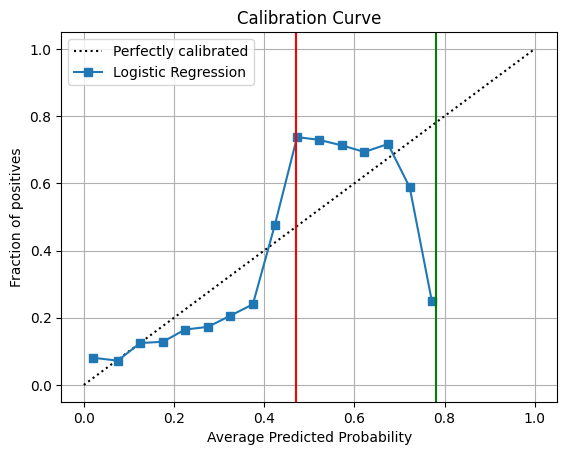

In [ ]:
# Add the calibration curve for the gradient boosted tree
plt.grid()
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')
plt.axvline(x=0.47, color='red')
# plt.axhline(y=0.74, color='red')
plt.axvline(x=0.78, color='green')
# plt.axhline(y=0.24, color='green')
# plt.plot(mean_pred_val_gbt, frac_of_pos_gbt,
#          's-', label='%s' % 'Gradient Boosted tree')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

- The point of calibration touch by the red line has 0.75 fraction of default loans. However, the average predicted probability is very low, which is around 0.45.

- The other point which is below the perfect line of calibration, has around 0.78% of probability default while having 0.3 of default fractions.

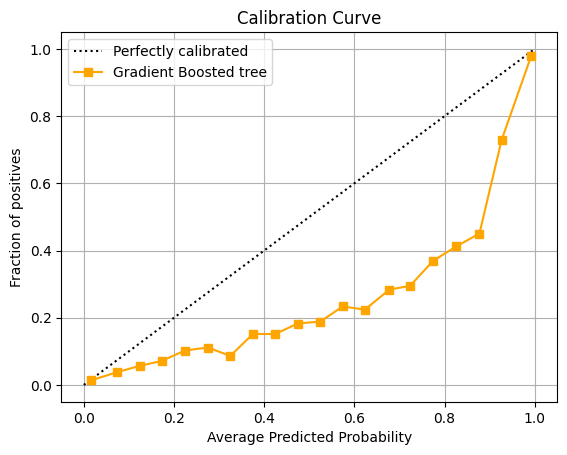

In [ ]:
# Add the calibration curve for the gradient boosted tree
plt.grid()
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
# plt.plot(mean_pred_val_lr, frac_of_pos_lr,
#          's-', label='%s' % 'Logistic Regression')
# plt.axvline(x=0.47, color='red')
# plt.axhline(y=0.74, color='red')
# plt.axvline(x=0.78, color='green')
# plt.axhline(y=0.24, color='green')
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt,
         's-', label='%s' % 'Gradient Boosted tree', color='orange')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

In [ ]:
frac_of_pos_lr, mean_pred_val_lr = calibration_curve(y_test, lr_predict_proba[:,1], n_bins=200)
frac_of_pos_gbt, mean_pred_val_gbt = calibration_curve(y_test, gbt_predict_proba[:,1], n_bins=200)

#### **Credit Acceptance rate**

- Use model predictions to set better thresholds
  - Can also be used to approve or deny new loans.
- For all new loans, we want to deny probable defaults
  - Use the test data as an example of new loans.

- Acceptance rate: **what percentage of new loans are accepted to keep the number of defaults in a portfolio low**
  - accepted loans which are defaults have an impact similar to false negatives.

In [ ]:
test_results

,loan_status,prob_default
0,0,0.040804
1,0,0.015366
2,0,0.038305
3,0,0.002418
4,0,0.000930
...,...,...
11779,1,0.025391
11780,0,0.075724
11781,0,0.241993
11782,0,0.046572


In [ ]:
# Use the parameters derived from Gradient Boosted Model
print(test_results['prob_default'].describe())

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(test_results['prob_default'], 0.85)

# Apply acceptance rate threshold
test_results['pred_loan_status'] = test_results['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(test_results['pred_loan_status'].value_counts())

count    11784.000000
mean         0.211339
std          0.341685
min          0.000003
25%          0.009352
50%          0.042235
75%          0.182879
max          0.999994
Name: prob_default, dtype: float64
0    10016
1     1768
Name: pred_loan_status, dtype: int64


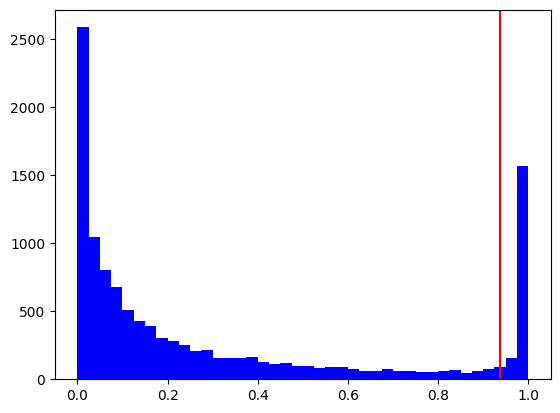

In [ ]:
plt.hist(gbt_predict_proba[:,1], color='blue', bins=40)

threshold = np.quantile(gbt_predict_proba[:,1], 0.85)

plt.axvline(x=threshold, color='red')
plt.show()

#### **Bad rates**

In [ ]:
accepted_loans = test_results[test_results['pred_loan_status']==0]
bad_rates = np.sum(accepted_loans['loan_status']/accepted_loans['loan_status'].count())
print("Bad rates: ", bad_rates)

Bad rates:  0.08316693290734824


#### **Accepted rate impact**

In [ ]:
test_results['loan_amnt'] = X_test['loan_amnt']

# Print the statistics of the loan amount
print(test_results['loan_amnt'].describe())

avg_loan = np.mean(test_results['loan_amnt'])

count     4224.000000
mean      8344.182055
std       5572.388941
min        500.000000
25%       4800.000000
50%       7000.000000
75%      10000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [ ]:
pd.options.display.float_format = '${:,.2f}'.format
print(pd.crosstab(test_results['loan_status'],
            test_results['pred_loan_status']).apply(lambda x: x *avg_loan, axis=0))
pd.reset_option('^display.', silent=True)

pred_loan_status              0              1
loan_status                                   
0                $76,624,623.81     $83,441.82
1                 $6,950,703.65 $14,669,072.05


#### **Credit strategy & minimum expected loss**

- Selecting acceptance rates
  - first acceptance rate was set to *85%*, but other rates might be selected as well.
- Two options to test different rates:
  - Calculate the threshold, bad rate, and losses manually.
  - Create a table of these values and select an acceptance rate.
- The table of all possible values is called **Strategy table**
- **Total expected loss** - how much we expect to lose on the defaults in our portfolio

Expected_Loss = Sum(PD * LGD * EAD)

In [ ]:
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.6, 0.6, 0.55,
                0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0,2, 0.15, 0.1, 0.05]

In [ ]:
accept_rates = (np.arange(0.05, 1.05, 0.05)).tolist()

thresholds = []
bad_rates = []
for rate in accept_rates:
  # Calculate the threshold for the acceptance rate
  thresh = np.quantile(test_results['prob_default'], rate).round(3)
  # Add the threshold value to the list of thresholds
  thresholds.append(thresh)
  # Reassign the loan status value using the threshold
  test_results['pred_loan_status'] = test_results['prob_default'].apply(lambda x: 1 if x > thresh else 0)
  # Create a set of accepted loans using this acceptance rate
  accepted_loans = test_results[test_results['pred_loan_status'] == 0]
  # Calculate and append the bad rate using the acceptance rate
  bad_rates.append(np.sum(accepted_loans['loan_status'])/len(accepted_loans['loan_status']))

<ipython-input-121-4b57e810e7ac>:15: RuntimeWarning:

invalid value encountered in long_scalars



In [ ]:
# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates),
                        columns = ['Acceptance Rate','Threshold','Bad Rate'])

# Print the entire table
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate
0              0.05      0.000       NaN
1              0.10      0.001  0.000000
2              0.15      0.002  0.000612
3              0.20      0.006  0.004580
4              0.25      0.009  0.005897
5              0.30      0.014  0.009215
6              0.35      0.019  0.012151
7              0.40      0.025  0.016432
8              0.45      0.033  0.019660
9              0.50      0.042  0.021110
10             0.55      0.055  0.025396
11             0.60      0.070  0.030303
12             0.65      0.093  0.035943
13             0.70      0.127  0.043304
14             0.75      0.183  0.051256
15             0.80      0.297  0.059835
16             0.85      0.804  0.083167
17             0.90      0.984  0.133308
18             0.95      0.996  0.176328
19             1.00      1.000  0.219874


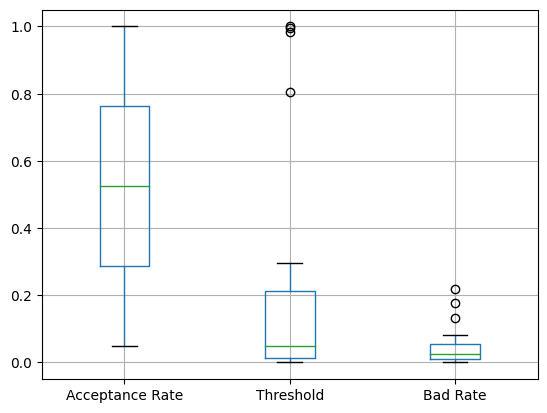

In [ ]:
# Visualize the distributions in the strategy table with a boxplot
strat_df.boxplot()
plt.show()

In [ ]:
strat_df['Num Accepted Loans'] = strat_df['Acceptance Rate'] * len(X_test)
strat_df['Avg Loan Amnt'] = avg_loan_amnt.round(3)
strat_df['Estimated Value'] = (strat_df['Num Accepted Loans']*(1-strat_df["Bad Rate"])*strat_df["Avg Loan Amnt"])-(strat_df['Num Accepted Loans']*strat_df["Bad Rate"]*strat_df["Avg Loan Amnt"])
strat_df['loss_given_default'] = 1

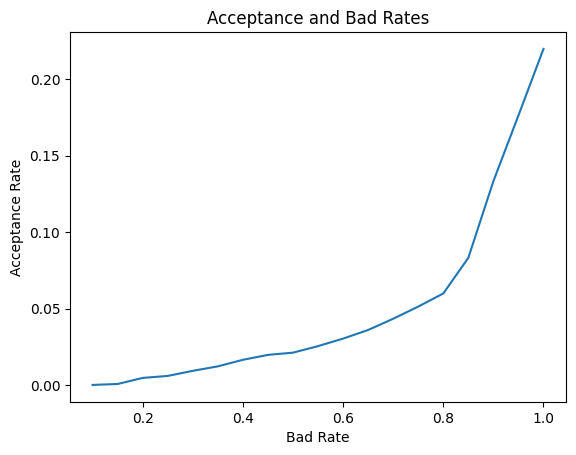

In [ ]:
# Plot the strategy curve
plt.plot(strat_df["Acceptance Rate"], strat_df['Bad Rate'])
plt.ylabel('Acceptance Rate')
plt.xlabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.show()

#### **Estimating value profiling**

In [ ]:
# Print the row with the max estimated value
strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])]

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg Loan Amnt,Estimated Value,oss_given_default,loss_given_default
16,0.85,0.804,0.083167,10016.4,9583.587,8.002615e+07,1,1


#### **Total Expected Loss**

In [ ]:
# Create new column
test_results['expected_loss'] = test_results['prob_default'] * 1 * test_results['loan_amnt']

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(test_results['expected_loss']),2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))

Total expected loss:  $7,468,154.93
